Primeiras linhas do dataset:
   Racao_kg_dia  Dias_Confinamento  Area_Pastagem_ha Qualidade_Pasto  \
0     10.618102                249          6.025638            Ruim   
1     19.260715                156          4.817998           Média   
2     15.979909                217          9.157189           Média   
3     13.979877                107          2.000777           Média   
4      7.340280                114          5.433626            Ruim   

   Suplementacao_kg_dia  Peso_Medio_Final_kg  
0              1.810976           595.520834  
1              1.601907           511.488566  
2              1.501908           735.477346  
3              1.899101           535.029322  
4              0.888101           282.255069  


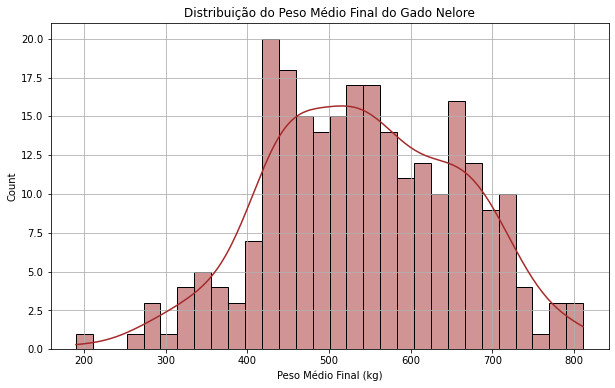

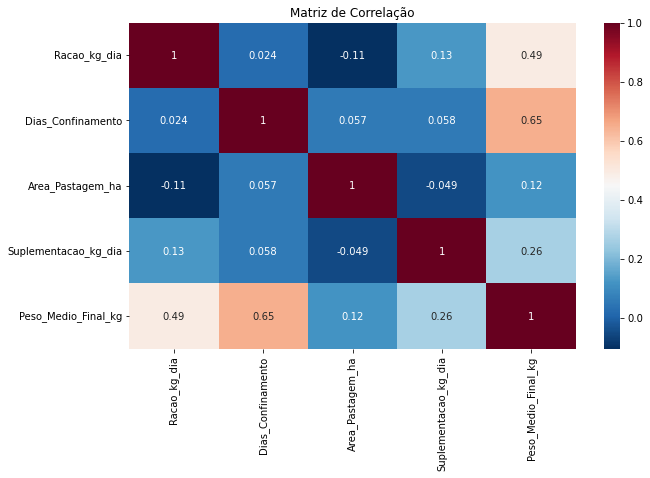

MAE (Erro Médio Absoluto): 42.17 kg
R² (Coeficiente de Determinação): 0.77


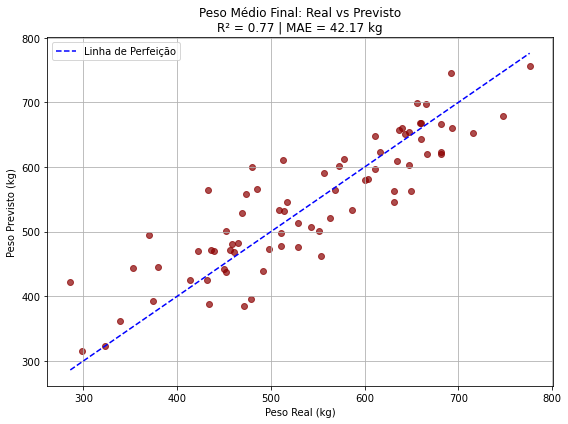

In [5]:
# Projeto de Machine Learning: Previsão de Peso Médio de Gado Nelore
#
# Contexto:
# Você está trabalhando para uma fazenda que deseja prever o peso médio final do gado Nelore 
# com base em características dos lotes:
# - Quantidade de ração fornecida
# - Número de dias em confinamento
# - Área de pastagem disponível
# - Qualidade do pasto
# - Taxa de suplementação proteica
#
# A tarefa é:
# - Gerar um conjunto de dados fictício e realista
# - Treinar um modelo de regressão
# - Avaliar o modelo
# - Visualizar os resultados
#
# Vamos começar!

# Etapa 1: Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Etapa 2: Gerar Dados Fictícios de Criação de Gado Nelore
np.random.seed(42)

n_lotes = 250

# Variáveis
racao_kg_dia = np.random.uniform(5, 20, n_lotes)  # kg de ração por dia
dias_confinamento = np.random.randint(90, 250, n_lotes)  # dias em confinamento
area_pastagem = np.random.uniform(1, 10, n_lotes)  # hectares por lote
qualidade_pasto = np.random.choice(['Ruim', 'Média', 'Boa'], n_lotes)  # qualidade do pasto
suplementacao = np.random.uniform(0.5, 3.0, n_lotes)  # kg de suplemento por animal/dia

# Converter qualidade do pasto em valor numérico
mapa_pasto = {'Ruim': 0, 'Média': 1, 'Boa': 2}
qualidade_pasto_num = np.array([mapa_pasto[q] for q in qualidade_pasto])

# Fórmula fictícia para Peso Médio Final
peso_medio_final = (
    (racao_kg_dia * 12) +
    (dias_confinamento * 1.5) +
    (area_pastagem * 5) +
    (suplementacao * 30) +
    (qualidade_pasto_num * 50) +
    np.random.normal(0, 50, n_lotes)  # ruído
)

# Criar DataFrame
df_gado = pd.DataFrame({
    'Racao_kg_dia': racao_kg_dia,
    'Dias_Confinamento': dias_confinamento,
    'Area_Pastagem_ha': area_pastagem,
    'Qualidade_Pasto': qualidade_pasto,
    'Suplementacao_kg_dia': suplementacao,
    'Peso_Medio_Final_kg': peso_medio_final
})

# Etapa 3: Visualização Inicial
print("Primeiras linhas do dataset:")
print(df_gado.head())

# Etapa 4: Análise Exploratória
plt.figure(figsize=(10,6))
sns.histplot(df_gado['Peso_Medio_Final_kg'], bins=30, kde=True, color='brown')
plt.title("Distribuição do Peso Médio Final do Gado Nelore")
plt.xlabel("Peso Médio Final (kg)")
plt.grid(True)
plt.show()

# Matriz de Correlação
plt.figure(figsize=(10,6))
sns.heatmap(df_gado.drop(columns=['Qualidade_Pasto']).corr(), annot=True, cmap='RdBu_r')
plt.title("Matriz de Correlação")
plt.show()

# Etapa 5: Preparar os Dados para o Modelo
X = df_gado[['Racao_kg_dia', 'Dias_Confinamento', 'Area_Pastagem_ha', 'Suplementacao_kg_dia']]

# Transformar qualidade do pasto em dummies
X = pd.concat([X, pd.get_dummies(df_gado['Qualidade_Pasto'], prefix='Pasto', drop_first=True)], axis=1)

y = df_gado['Peso_Medio_Final_kg']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Etapa 6: Treinar o Modelo de Regressão
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Etapa 7: Fazer Previsões
y_pred = modelo.predict(X_test)

# Etapa 8: Avaliação do Modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erro Médio Absoluto): {mae:.2f} kg")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# Etapa 9: Visualizar Real vs Previsto
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label="Linha de Perfeição")
plt.xlabel("Peso Real (kg)")
plt.ylabel("Peso Previsto (kg)")
plt.title(f"Peso Médio Final: Real vs Previsto\nR² = {r2:.2f} | MAE = {mae:.2f} kg")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()